In [1]:
%load_ext autoreload
%autoreload 2

import wandb_util.wandb_util as wbu
import multiprocessing as mp
mp.set_start_method('spawn', force=True)

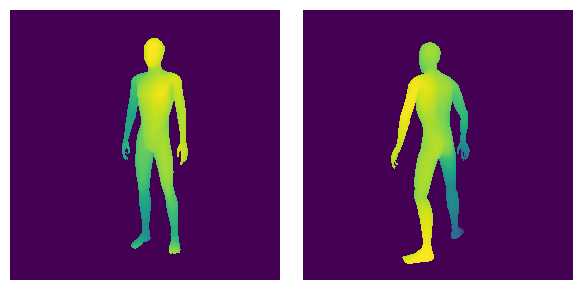

In [18]:
from scripts.wandb_experiments.fixed_kfs_exp import (
    FixGrKeyframesExp,
    fixed_gr_keyframes_exp,
)
from omegaconf import OmegaConf
from text3d2video.artifacts.anim_artifact import AnimationArtifact
from text3d2video.rendering import render_depth_map
from text3d2video.utilities.ipython_utils import display_ims


config = FixGrKeyframesExp(
    prompt="Ironman",
    anim_tag="catwalk_180_20:latest",
    kf_indices=[[0], [17], [0, 17]],
)

config = OmegaConf.structured(config)

anim = AnimationArtifact.from_wandb_artifact_tag(config.anim_tag)
cams, meshes = anim.load_frames()
depths = render_depth_map(meshes, cams)

kf_indices = [0, 15]

display_ims([depths[i] for i in kf_indices])

In [19]:
wbu.sync_experiment(
    fixed_gr_keyframes_exp, config, "catwalk_180_fix_kfs_ironman", rerun_all=False
)

Experiment: https://wandb.ai/romeu/diffusion-3D-features/groups/catwalk_180_fix_kfs_ironman/workspace
Experiment up-to-date!


In [4]:
from scripts.wandb_experiments.fixed_kfs_exp import get_data

# exp = "metal_cat_keyframes_high_guidance"
# exp = "metal_cat_keyframes"
exp = "catwalk_180_fix_kfs_ironman"
data = get_data(exp)

In [20]:
experiments = [
    "catwalk_180_fix_kfs_ironman",
    "catwalk_180_fix_kfs",
    "catwalk_180_fix_kfs_stormtrooper",
    "metal_cat_keyframes",
    "metal_cat_keyframes_high_guidance",
]

In [22]:
from scripts.wandb_experiments.fixed_kfs_exp import make_video
from text3d2video.utilities.ipython_utils import display_vid


vid = make_video(experiments[1])
display_vid(vid)

In [23]:
from scripts.wandb_experiments.fixed_kfs_exp import make_video
from text3d2video.util import create_fresh_dir
from text3d2video.utilities.ipython_utils import display_vid

videos_dir = create_fresh_dir('outs/fix_kfs')

for e in experiments:
    video = make_video(e)
    video.write_videofile(str(videos_dir / f"{e}.mp4"))


Moviepy - Building video outs/fix_kfs/catwalk_180_fix_kfs_ironman.mp4.
Moviepy - Writing video outs/fix_kfs/catwalk_180_fix_kfs_ironman.mp4



Moviepy - Done !
Moviepy - video ready outs/fix_kfs/catwalk_180_fix_kfs_ironman.mp4
Moviepy - Building video outs/fix_kfs/catwalk_180_fix_kfs.mp4.
Moviepy - Writing video outs/fix_kfs/catwalk_180_fix_kfs.mp4



Moviepy - Done !
Moviepy - video ready outs/fix_kfs/catwalk_180_fix_kfs.mp4
Moviepy - Building video outs/fix_kfs/catwalk_180_fix_kfs_stormtrooper.mp4.
Moviepy - Writing video outs/fix_kfs/catwalk_180_fix_kfs_stormtrooper.mp4



Moviepy - Done !
Moviepy - video ready outs/fix_kfs/catwalk_180_fix_kfs_stormtrooper.mp4
Moviepy - Building video outs/fix_kfs/metal_cat_keyframes.mp4.
Moviepy - Writing video outs/fix_kfs/metal_cat_keyframes.mp4



Moviepy - Done !
Moviepy - video ready outs/fix_kfs/metal_cat_keyframes.mp4
Moviepy - Building video outs/fix_kfs/metal_cat_keyframes_high_guidance.mp4.
Moviepy - Writing video outs/fix_kfs/metal_cat_keyframes_high_guidance.mp4



Moviepy - Done !
Moviepy - video ready outs/fix_kfs/metal_cat_keyframes_high_guidance.mp4
